In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import random
import seaborn as sns
import pandas as pd 
from tqdm import tqdm

In [2]:
def sigmoid (x):
    return 1/(1+np.exp(-x))

def hidden (X,W_1,b):
    return sigmoid(np.dot(W_1,X)+b)

def output (H,W_2,b):
    return sigmoid(np.dot(W_2.T,H)+b)

def delta_2(o,y):
    return ((o-y)*o*(1-o))

def delta_1(W_2,h,d2):
    d1=np.zeros(shape=(3,1))
    for j in range(d1.shape[0]):
        d1[j] = W_2[j]*d2*h[j] * (1-h[j])
    return d1

def djdW_2(h,d2):
    dj=np.zeros(shape=(3,1))
    for j in range(dj.shape[0]):
        dj[j] = d2*h[j]
    return dj

def djdW_1(X,d1):
    dj=np.zeros(shape=(3,2))
    for j in range(dj.shape[0]):
        for i in range(dj.shape[1]):
          dj[j, i] = d1[j][0] * X[i][0]
    return dj
    

In [3]:
np.random.seed(42)
X=np.random.standard_normal(size=(2,1))
W_1=np.random.standard_normal(size=(3,2))
W_2=np.random.standard_normal(size=(3,1))
b_1=np.random.standard_normal(size=(3,1))
b_2=random.normalvariate(mu=0,sigma=1)
y=random.normalvariate(mu=0,sigma=1)

h = hidden(X,W_1,b_1)
o = output(h,W_2,b_2)

In [4]:
d2,djdb_2 = delta_2(o,y),delta_2(o,y)
d1,djdb_1 = delta_1(W_2,h,d2),delta_1(W_2,h,d2)

In [5]:
dj2=djdW_2(h,d2)
dj1=djdW_1(X,d1)

In [6]:
def train_model(X,W_1,W_2,b_1,b_2,y,alpha):
    for i in range (y.shape[0]):
        h=hidden(X[i].reshape(-1,1),W_1,b_1)
        o=output(h,W_2,b_2)
        d2,djdb_2=delta_2(o,y[i]),delta_2(o,y[i])
        d1,djdb_1 =delta_1(W_2,h,d2),delta_1(W_2,h,d2)
        dj2=djdW_2(h,d2)
        dj1=djdW_1(X[i].reshape(-1,1),d1)
        W_2 -= alpha*dj2
        W_1 -= alpha*dj1
        b_1 -= alpha*djdb_1
        b_2 -= alpha*djdb_2
        return W_1,W_2,b_1,b_2

def predict_model(X,W_1,W_2,b_1,b_2,y):
    y_hat=[]
    for i in range (X.shape[0]):
        h = hidden(X[i].reshape(-1,1),W_1,b_1)
        o=output(h,W_2,b_2)
        y_hat.append(o)
    return y_hat
        

In [7]:
from sklearn.datasets import make_circles

<Axes: >

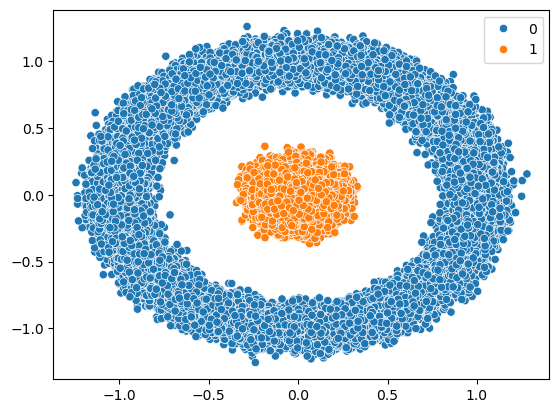

In [8]:
data, labels = make_circles(100000, noise=0.07, factor=0.1, random_state = 42)
sns.scatterplot(x=data[:,0], y=data [:,1],hue = labels)


In [9]:
alpha= 0.001
epochs=30
for i in tqdm(range(epochs)):
    W_1,W_2,b_1,b_2=train_model(data,W_1,W_2,b_1,b_2,labels,alpha)
    y_hat=predict_model(data,W_1,W_2,b_1,b_2,labels)

100%|███████████████████████████████████████████| 30/30 [00:16<00:00,  1.79it/s]


In [10]:
y_hat = np.array(y_hat)
y_hat=np.where(y_hat>0.5,1,0)

In [11]:
def accuracy (y_hat,y):
    good_pred=y_hat[y_hat ==y]
    good_pred = np.ones_like(good_pred)
    return np.sum(good_pred)/len(y_hat)